In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('/Users/alokroy/Documents/Programming/Projects/Amex/data/data/train_data_new.csv')
test_data = pd.read_csv('/Users/alokroy/Documents/Programming/Projects/Amex/data/data/test_data_new.csv')

In [3]:
train_data.head()

,team_wicket_loss_average,team_count_50runs_last15,team_winp_last5,team_bowler_performance_ratio,team_strike_rate,team_avg_wicket,team_batting_strength,team_win_rate_at_venue,team_batsman_performance_index,team_overall_win_rate,...,team_avg_eco,team_avg_score_ground_ratio,avg_score_ground_batting_first_ratio,match_experience_score_ratio,boundary_frequency_ratio,avg_runs_powerplay_ratio,total_wickets_bowlers_recent_ratio,total_runs_top_batsmen_recent_ratio,total_runs_top_batsmen_ratio,winner_01
0,-1.368785,1.210788,0.672131,1.244528,2.148438,1.238807,1.173089,7.071068e-01,1.972308,-0.083475,...,-0.554419,-0.104744,0.046338,1.368785,0.738186,0.115396,1.316632,1.178372,1.478076,1
1,-1.041201,0.564618,1.952381,-0.461919,-1.112081,-0.521669,-0.091446,1.490116e-08,-1.107182,0.854515,...,-0.285641,0.191746,0.416732,0.975199,-0.595941,0.247339,-0.893293,-0.088788,1.107182,0
2,0.485610,-0.232356,0.672131,0.615018,-0.497557,0.352594,-0.035741,1.490116e-08,-0.369545,-0.667032,...,-0.172086,0.349779,-0.418176,-1.494046,-0.244610,-0.470772,0.618219,-0.035741,-1.396318,0
3,0.003970,1.432296,1.975610,-0.485610,1.162619,-0.527744,1.285775,1.490116e-08,0.762741,0.324563,...,-0.531796,0.274726,1.279749,-0.453102,0.375219,0.913194,-0.406649,1.291848,-0.220136,0
4,1.589567,-0.294019,1.327869,0.366713,0.222848,0.041039,-0.080819,1.000000e+00,0.225562,-0.738186,...,0.204372,-0.776981,-0.846914,-0.435573,-0.476694,0.521669,0.068874,0.206596,-0.461919,1


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_density(train_data, test_data, column_name):

    title = f"'Density Plot of {column_name}"
    xlabel = column_name
    ylabel = 'Density'
   
    plt.figure(figsize=(10, 6))
    sns.kdeplot(train_data[column_name], fill=True, label='Train Data')
    sns.kdeplot(test_data[column_name], fill=True, label='Test Data')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [5]:
# plot_density(train_data, test_data, 'team_wicket_loss_average')

In [6]:
# for col in train_data.columns:
#     plot_density(train_data, test_data, col)

In [7]:
train_data.corr()['winner_01'].sort_values()

avg_score_ground_batting_first_ratio   -0.226530
team_avg_score_ground_ratio            -0.219863
team_win_percentage_fielding_first     -0.219447
match_experience_score_ratio           -0.219131
team_batting_strength                  -0.190013
total_runs_top_batsmen_recent_ratio    -0.186817
team_batsman_runs_recent               -0.186817
total_runs_top_batsmen_ratio           -0.182399
team_bowler_performance_ratio          -0.166911
team_batsman_performance_recent        -0.160832
team_avg_wicket                        -0.157641
team_pom_frequency                     -0.157227
team_avg_wickets_top5_bowlers          -0.151704
team_count_50runs_last15               -0.147812
total_wickets_bowlers_recent_ratio     -0.145209
boundary_frequency_ratio               -0.143416
avg_runs_powerplay_ratio               -0.142774
team_strike_rate                       -0.132729
team_count_100runs_ratio_last15        -0.126637
team_batsman_performance_index         -0.110905
team_SR             

## Feature Selection

### 1. Recursive Feature Elimination (RFE)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

# Define the features and target variable
X = train_data.drop('winner_01', axis=1)  # Assuming 'winner_01' is the target variable
y = train_data['winner_01']

# Handle missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Split the dataset into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_imputed_df, y, test_size=0.0, random_state=42)
X_train = X_imputed_df
y_train = y

# Create a RandomForest classifier to use with RFE
model = RandomForestClassifier(n_estimators=100, random_state=42)

# RFE with RandomForest for the top 15 features
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print selected features
print("Selected features:", selected_features)

# Model training can be done here using the selected features
# For example:
# X_train_selected = X_train[selected_features]
# X_val_selected = X_val[selected_features]


Selected features: Index(['team_bowler_performance_ratio', 'team_batting_strength',
       'team_pom_frequency', 'team_win_percentage_fielding_first',
       'team_avg_runs_1st_inning', 'team_SR', 'team_avg_eco',
       'team_avg_score_ground_ratio', 'avg_score_ground_batting_first_ratio',
       'match_experience_score_ratio'],
      dtype='object')


Selected features: Index(['team_bowler_performance_ratio', 'team_strike_rate', 'team_avg_wicket',
       'team_batting_strength', 'team_batsman_performance_recent',
       'team_pom_frequency', 'team_win_percentage_fielding_first',
       'team_avg_runs_1st_inning', 'team_SR', 'team_avg_eco',
       'team_avg_score_ground_ratio', 'avg_score_ground_batting_first_ratio',
       'match_experience_score_ratio', 'boundary_frequency_ratio',
       'avg_runs_powerplay_ratio'],
      dtype='object')

In [9]:
# selected_features = train_data.corr()['winner_01'].sort_values()[:10].index

In [10]:
# selected_features

## Model

In [11]:
train_data.fillna(0, inplace=True)

In [12]:
df = train_data[selected_features]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df
# y = df['winner_01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

NameError: name 'X_train' is not defined

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are defined

# Initialize models
GBM_model = GradientBoostingClassifier()
LGBM_model = LGBMClassifier()
XGB_model = XGBClassifier()
CatBoost_model = CatBoostClassifier()

# Train the models
GBM_model.fit(X_train, y_train)
LGBM_model.fit(X_train, y_train)
XGB_model.fit(X_train, y_train)
CatBoost_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_GBM_test = GBM_model.predict(X_test)
y_pred_LGBM_test = LGBM_model.predict(X_test)
y_pred_XGB_test = XGB_model.predict(X_test)
y_pred_CatBoost_test = CatBoost_model.predict(X_test)

# Make predictions on train set
y_pred_GBM_train = GBM_model.predict(X_train)
y_pred_LGBM_train = LGBM_model.predict(X_train)
y_pred_XGB_train = XGB_model.predict(X_train)
y_pred_CatBoost_train = CatBoost_model.predict(X_train)

# Evaluate models on test data
accuracy_GBM_test = accuracy_score(y_test, y_pred_GBM_test)
accuracy_LGBM_test = accuracy_score(y_test, y_pred_LGBM_test)
accuracy_XGB_test = accuracy_score(y_test, y_pred_XGB_test)
accuracy_CatBoost_test = accuracy_score(y_test, y_pred_CatBoost_test)

# Evaluate models on train data
accuracy_GBM_train = accuracy_score(y_train, y_pred_GBM_train)
accuracy_LGBM_train = accuracy_score(y_train, y_pred_LGBM_train)
accuracy_XGB_train = accuracy_score(y_train, y_pred_XGB_train)
accuracy_CatBoost_train = accuracy_score(y_train, y_pred_CatBoost_train)

# Print accuracies
print("Accuracy for GBM model on training data:", accuracy_GBM_train)
print("Accuracy for GBM model on testing data:", accuracy_GBM_test)
print('====================================================================')
print("Accuracy for LGBM model on training data:", accuracy_LGBM_train)
print("Accuracy for LGBM model on testing data:", accuracy_LGBM_test)
print('====================================================================')
print("Accuracy for XGB model on training data:", accuracy_XGB_train)
print("Accuracy for XGB model on testing data:", accuracy_XGB_test)
print('====================================================================')
print("Accuracy for CatBoost model on training data:", accuracy_CatBoost_train)
print("Accuracy for CatBoost model on testing data:", accuracy_CatBoost_test)

[LightGBM] [Info] Number of positive: 386, number of negative: 372
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2526
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509235 -> initscore=0.036944
[LightGBM] [Info] Start training from score 0.036944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [16]:
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

X_val = X_test
y_val = y_test

# Initialize the base models
xgb_model = XGBClassifier(n_estimators=50, learning_rate=0.05, random_state=42)
cat_model = CatBoostClassifier(iterations=50, learning_rate=0.05, depth=3, verbose=False, random_state=42)

# Create the bagging ensemble model
xgb_bagging = BaggingClassifier(estimator=xgb_model, n_estimators=10, random_state=42)
cat_bagging = BaggingClassifier(estimator=cat_model, n_estimators=10, random_state=42)

# Fit the models
xgb_bagging.fit(X_train, y_train)
cat_bagging.fit(X_train, y_train)

# Make predictions
xgb_bag_pred = xgb_bagging.predict_proba(X_val)[:, 1]
cat_bag_pred = cat_bagging.predict_proba(X_val)[:, 1]

# Weighted Averaging
# Assume XGB is weighted 0.6 and CatBoost 0.4 based on prior validation scores
weighted_pred = xgb_bag_pred * 0.4 + cat_bag_pred * 0.6
final_predictions_weighted = np.where(weighted_pred > 0.5, 1, 0)

# Stacking
estimators = [
    ('xgb', xgb_bagging),
    ('cat', cat_bagging)
]
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)
stack_pred = stack_model.predict(X_val)

# Evaluate the models
accuracy_weighted = accuracy_score(y_val, final_predictions_weighted)
accuracy_stacked = accuracy_score(y_val, stack_pred)

print("Accuracy of the weighted model:", accuracy_weighted)
print("Accuracy of the stacking model:", accuracy_stacked)

Accuracy of the weighted model: 0.6684210526315789
Accuracy of the stacking model: 0.6526315789473685


In [17]:
xgb_model = XGBClassifier(n_estimators=50, random_state=42)
cat_model = CatBoostClassifier(iterations=50, verbose=False, random_state=42)
gbm_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
lgb_model = LGBMClassifier(n_estimators=50, random_state=42)

models = {
    'XGB': xgb_model,
    'CatBoost': cat_model,
    'GBM': gbm_model,
    'LightGBM': lgb_model
}

# Function to train and predict
def train_predict(models, X_train, y_train, X_val):
    predictions = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict_proba(X_val)[:, 1]
        predictions[name] = preds
    return predictions

# Evaluate combinations of models
def evaluate_combinations(X_train, y_train, X_val, y_val):
    model_predictions = train_predict(models, X_train, y_train, X_val)
    results = {}
    
    for r in range(1, len(models)+1):
        for combo in combinations(models.keys(), r):
            # Average predictions from models in the current combination
            combo_preds = np.mean([model_predictions[model] for model in combo], axis=0)
            final_predictions = np.where(combo_preds > 0.5, 1, 0)
            accuracy = accuracy_score(y_val, final_predictions)
            results[combo] = accuracy
    
    return results

# Main function to run the analysis
def main(X_train, X_test, y_train, y_test):
    X_train, X_val, y_train, y_val = X_train, X_test, y_train, y_test
    results = evaluate_combinations(X_train, y_train, X_val, y_val)
    
    for combo, accuracy in results.items():
        print(f"Models: {', '.join(combo)} - Accuracy: {accuracy:.4f}")

# Run the main function
main(X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 386, number of negative: 372
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2526
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509235 -> initscore=0.036944
[LightGBM] [Info] Start training from score 0.036944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

### Catboost

In [18]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the model
# model = CatBoostClassifier(verbose=0, task_type="CPU")

# # Parameters grid
# params = {
#     'iterations': [100, 200, 300],
#     'learning_rate': [0.0001, 0.001, 0.01, 0.1],
#     'depth': [3, 4, 5, 6],
#     'l2_leaf_reg': [0.001, 0.01, 0.1]
# }

# # Setup the grid search
# grid = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='accuracy')

# # Fitting grid search
# grid.fit(X_train, y_train)

# # Best parameters and best score
# print("Best parameters found: ", grid.best_params_)
# print("Best accuracy found: ", grid.best_score_)

# # Evaluate on the test set
# best_model = grid.best_estimator_
# test_accuracy = best_model.score(X_test, y_test)
# print("Test set accuracy: ", test_accuracy)

In [19]:
# import optuna
# from catboost import Pool
# train_pool = Pool(data=X_train, label=y_train)
# valid_pool = Pool(data=X_test, label=y_test)

# # Define the objective function for hyperparameter tuning
# def objective(trial):
#     params = {
#         'iterations': trial.suggest_int('iterations', 100, 400),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
#         'depth': trial.suggest_int('depth', 3, 6),
#         'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 1.0),
#         'border_count': trial.suggest_int('border_count', 32, 255),
#         'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 1.0),
#         'random_strength': trial.suggest_loguniform('random_strength', 1e-3, 10.0),
#         'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
#         'od_wait': trial.suggest_int('od_wait', 10, 50),
#         'verbose': 0  # Suppress output for tuning
#     }
    
#     model = CatBoostClassifier(**params)
#     model.fit(train_pool)
#     preds = model.predict(valid_pool)
#     accuracy = accuracy_score(y_test, preds)
    
#     return accuracy  # Minimize the negative accuracy

# # Create and run the Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=1000)

# # Get the best parameters
# best_params = study.best_params
# print(f"Best parameters: {best_params}")

# # Train the final model with the best parameters
# best_model_catboost = CatBoostClassifier(
#     iterations=best_params['iterations'],
#     learning_rate=best_params['learning_rate'],
#     depth=best_params['depth'],
#     l2_leaf_reg=best_params['l2_leaf_reg'],
#     border_count=best_params['border_count'],
#     bagging_temperature=best_params['bagging_temperature'],
#     random_strength=best_params['random_strength'],
#     od_type=best_params['od_type'],
#     od_wait=best_params['od_wait'],
#     verbose=100  # To monitor the training process
# )

# best_model_catboost.fit(X_train, y_train)

# # Evaluate the final model on the validation set
# final_preds = best_model_catboost.predict(X_test)
# final_accuracy = accuracy_score(y_test, final_preds)
# print(final_accuracy)

Best parameters: {'iterations': 111, 'learning_rate': 0.00039158483289330825, 'depth': 6, 'l2_leaf_reg': 0.33268648344954016, 'border_count': 81, 'bagging_temperature': 0.03560662883905888, 'random_strength': 0.0973199007678726, 'od_type': 'IncToDec', 'od_wait': 19}

In [20]:
# pred_train = best_model_catboost.predict(X_train)
# accuracy_score(y_train, pred_train)

In [21]:
test_parms = {'iterations': 90, 'learning_rate': 0.00018252773305712697, 'depth': 6, 'l2_leaf_reg': 0.0012314643153008098, 'border_count': 108, 'bagging_temperature': 0.046217755894046024, 'random_strength': 0.1058457108867618, 'od_type': 'Iter', 'od_wait': 40}

check_model = CatBoostClassifier(**test_parms)

check_model.fit(X_train, y_train)

pred_train = check_model.predict(X_train)
print(f"Accuracy on train data: {accuracy_score(y_train, pred_train)}")

pred_test = check_model.predict(X_test)
print(f"Accuracy on test data: {accuracy_score(y_test, pred_test)}")

0:	learn: 0.6931185	total: 1.06ms	remaining: 94.1ms
1:	learn: 0.6930909	total: 2.03ms	remaining: 89.2ms
2:	learn: 0.6930555	total: 2.69ms	remaining: 77.9ms
3:	learn: 0.6930182	total: 3.21ms	remaining: 69.1ms
4:	learn: 0.6929885	total: 3.72ms	remaining: 63.3ms
5:	learn: 0.6929587	total: 4.21ms	remaining: 59ms
6:	learn: 0.6929320	total: 4.79ms	remaining: 56.7ms
7:	learn: 0.6928977	total: 5.48ms	remaining: 56.1ms
8:	learn: 0.6928654	total: 6.01ms	remaining: 54.1ms
9:	learn: 0.6928314	total: 6.5ms	remaining: 52ms
10:	learn: 0.6928024	total: 6.99ms	remaining: 50.2ms
11:	learn: 0.6927667	total: 7.48ms	remaining: 48.6ms
12:	learn: 0.6927324	total: 8.04ms	remaining: 47.6ms
13:	learn: 0.6926967	total: 8.62ms	remaining: 46.8ms
14:	learn: 0.6926668	total: 9.25ms	remaining: 46.2ms
15:	learn: 0.6926374	total: 9.78ms	remaining: 45.2ms
16:	learn: 0.6926084	total: 10.3ms	remaining: 44.1ms
17:	learn: 0.6925791	total: 11.1ms	remaining: 44.4ms
18:	learn: 0.6925475	total: 11.7ms	remaining: 43.8ms
19:	lear

## Check

In [22]:
df_test = test_data[selected_features]
df_test.fillna(0, inplace=True)

scaler = StandardScaler()
X= scaler.fit_transform(X)
test = scaler.transform(df_test)


/var/folders/z7/t3qmw89j637f4y58ls6cb_vh0000gn/T/ipykernel_67568/2780721202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.fillna(0, inplace=True)


In [23]:
test = scaler.transform(df_test)

In [24]:
check_model.fit(X, y)

pred_train = check_model.predict(X)
print(f"Accuracy on train data: {accuracy_score(y, pred_train)}")

0:	learn: 0.6931181	total: 1.1ms	remaining: 98.2ms
1:	learn: 0.6930871	total: 2.05ms	remaining: 90.1ms
2:	learn: 0.6930549	total: 2.65ms	remaining: 76.8ms
3:	learn: 0.6930248	total: 3.14ms	remaining: 67.5ms
4:	learn: 0.6929942	total: 3.59ms	remaining: 61ms
5:	learn: 0.6929619	total: 4.09ms	remaining: 57.3ms
6:	learn: 0.6929315	total: 4.57ms	remaining: 54.2ms
7:	learn: 0.6929025	total: 5.1ms	remaining: 52.3ms
8:	learn: 0.6928716	total: 5.66ms	remaining: 50.9ms
9:	learn: 0.6928391	total: 6.16ms	remaining: 49.3ms
10:	learn: 0.6928112	total: 6.74ms	remaining: 48.4ms
11:	learn: 0.6927828	total: 7.27ms	remaining: 47.2ms
12:	learn: 0.6927512	total: 7.83ms	remaining: 46.4ms
13:	learn: 0.6927212	total: 8.36ms	remaining: 45.4ms
14:	learn: 0.6926880	total: 8.87ms	remaining: 44.3ms
15:	learn: 0.6926623	total: 9.41ms	remaining: 43.5ms
16:	learn: 0.6926310	total: 9.93ms	remaining: 42.7ms
17:	learn: 0.6926004	total: 10.5ms	remaining: 42ms
18:	learn: 0.6925704	total: 11.1ms	remaining: 41.6ms
19:	learn

In [25]:
best_pred = np.array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
                    0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
                    0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
                    0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
                    0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
                    0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
                    0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
                    1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
                    1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
                    0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
                    1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
                    0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
                    0, 0, 1, 1, 0, 0, 0])

In [26]:
preds = check_model.predict(test)

In [27]:
preds

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0])

In [28]:
(preds!=best_pred).sum()

22

In [29]:
result = np.where(best_pred != preds, -1, 0)

In [30]:
result

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [31]:
pred_prob = check_model.predict_proba(test)

In [32]:
pred_prob

array([[0.49430182, 0.50569818],
       [0.50027534, 0.49972466],
       [0.49845773, 0.50154227],
       [0.50060275, 0.49939725],
       [0.50158668, 0.49841332],
       [0.50190517, 0.49809483],
       [0.49567833, 0.50432167],
       [0.50204158, 0.49795842],
       [0.50198111, 0.49801889],
       [0.5012673 , 0.4987327 ],
       [0.50213095, 0.49786905],
       [0.50291332, 0.49708668],
       [0.49957184, 0.50042816],
       [0.5009523 , 0.4990477 ],
       [0.49541155, 0.50458845],
       [0.50126225, 0.49873775],
       [0.49757522, 0.50242478],
       [0.49902606, 0.50097394],
       [0.5006461 , 0.4993539 ],
       [0.49817137, 0.50182863],
       [0.50139607, 0.49860393],
       [0.50213648, 0.49786352],
       [0.50172562, 0.49827438],
       [0.49586703, 0.50413297],
       [0.49557239, 0.50442761],
       [0.49594161, 0.50405839],
       [0.49578971, 0.50421029],
       [0.50144514, 0.49855486],
       [0.49581246, 0.50418754],
       [0.50249176, 0.49750824],
       [0.

In [36]:
pred_prob[:, 1]

array([0.50569818, 0.49972466, 0.50154227, 0.49939725, 0.49841332,
       0.49809483, 0.50432167, 0.49795842, 0.49801889, 0.4987327 ,
       0.49786905, 0.49708668, 0.50042816, 0.4990477 , 0.50458845,
       0.49873775, 0.50242478, 0.50097394, 0.4993539 , 0.50182863,
       0.49860393, 0.49786352, 0.49827438, 0.50413297, 0.50442761,
       0.50405839, 0.50421029, 0.49855486, 0.50418754, 0.49750824,
       0.50293432, 0.49743689, 0.49699708, 0.50078481, 0.49888111,
       0.49756387, 0.49742185, 0.50070436, 0.50087661, 0.49883712,
       0.49787821, 0.49892064, 0.49698511, 0.49896723, 0.49832547,
       0.50353311, 0.50406098, 0.49762863, 0.4979272 , 0.50328709,
       0.49894704, 0.49779493, 0.49729477, 0.50279114, 0.49785228,
       0.49915632, 0.50047784, 0.49938065, 0.50413772, 0.50023412,
       0.49823643, 0.49740338, 0.49795117, 0.49893424, 0.50004117,
       0.50426725, 0.49780659, 0.50395409, 0.49842684, 0.49812393,
       0.50012518, 0.50364233, 0.50075366, 0.50491974, 0.50488

/opt/homebrew/Caskroom/miniforge/base/envs/amex/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/amex/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniforge/base/envs/amex/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


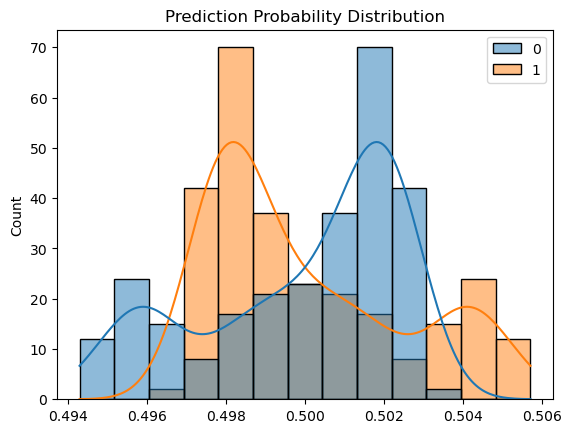

In [39]:
sns.histplot(pred_prob, kde=True)
plt.title('Prediction Probability Distribution')
plt.show()

In [34]:
df_test = pd.read_csv('/Users/alokroy/Documents/Programming/Projects/Amex/data/main/6644a1e287df6_test_data_with_samplefeatures.csv')
df_test['winner'] = preds
# df_test['win_pred_score'] = np.max(pred_proba, axis=1)

winner_id = []
for i in range(len(df_test)):
  if df_test['winner'][i] == 0:
    winner_id.append(df_test['team1_id'][i])
  else:
    winner_id.append(df_test['team2_id'][i])

df_test['win_pred_team_id'] = winner_id

In [35]:
# df_test.to_csv('check.csv', index=False)